In [1]:
import time
from tqdm import tqdm
import struct

#mensagembit = open("input.txt", 'rb').read()
#for i in range(0, len(mensagembit),2):
#    print(str(mensagembit[i]),str(mensagembit[i+1]))
#    print(chr(mensagembit[i]),chr(mensagembit[i+1]))
#    arr = bytearray([mensagembit[i],mensagembit[i+1]])
#    print(struct.unpack('H', arr))
mensagem = open("Disco Rígido Funcionando aberto.mp4", "rb").read()
mensagem = mensagem.decode('ISO-8859-1')
#print(mensagem)
#print(len(mensagem))

rc = []
rcIdeal = []
tempo = []
k = []
for K in range(9,17):
    
    start = time.time()
    dicionario = {}

    for i in range(2**8):
        dicionario[i.to_bytes(1, 'big')] = i

    newValue = 256
    comprimida = []
    new = ''
    old = ''

    for letra in tqdm(mensagem):
        new = old + letra
        #print(new)
        if new.encode('ISO-8859-1') not in dicionario: 
            if len(dicionario) < 2**K:
                dicionario[new.encode('ISO-8859-1')] = newValue
                newValue += 1
            
            numCod = dicionario[old.encode('ISO-8859-1')]
            #print(numCod, ' -> ', chr(numCod))
            #print()
            comprimida.append(numCod)
            
            old = letra
        else:
            old = new

    numCod = dicionario[old.encode('ISO-8859-1')]
    comprimida.append(numCod)
    
    end = time.time()
    
    outFile = open("intermediarios\intermediarioK" + str(K) + ".txt" , "wb")
    #print(comprimida)
    for i in comprimida:
        #print(chr(i))
        outFile.write(struct.pack('H', i))
        
    print('K = %d' %K)
    print('tamanho: %d -> %d' %(len(mensagem),len(comprimida)))
    CM = len(comprimida) * 16 / len(mensagem)
    rc.append(8/CM) 
    CM = len(comprimida) * K / len(mensagem)
    rcIdeal.append(8/CM) 
    #print('RC: %f' % (8/CM))
    tempo.append(end-start)
    #print('tempo %f segundos\n' % (end-start))
    
    outFile.close()

    k.append(K)


  4%|███                                                                         | 86484/2111047 [00:00<00:02, 858568.85it/s]

K = 9
tamanho: 2111047 -> 2097699


  4%|██▉                                                                         | 83013/2111047 [00:00<00:02, 824096.88it/s]

K = 10
tamanho: 2111047 -> 2090702


  4%|███                                                                         | 85277/2111047 [00:00<00:02, 850746.53it/s]

K = 11
tamanho: 2111047 -> 2081530


  4%|███                                                                         | 85813/2111047 [00:00<00:02, 851303.02it/s]

K = 12
tamanho: 2111047 -> 2069378


  9%|██████▌                                                                    | 183905/2111047 [00:00<00:02, 919133.43it/s]

K = 13
tamanho: 2111047 -> 1959288


  4%|██▉                                                                         | 83229/2111047 [00:00<00:02, 826268.57it/s]

K = 14
tamanho: 2111047 -> 1772621


  4%|██▋                                                                         | 75377/2111047 [00:00<00:02, 748171.43it/s]

K = 15
tamanho: 2111047 -> 1520385


100%|██████████████████████████████████████████████████████████████████████████| 2111047/2111047 [00:02<00:00, 933325.57it/s]


K = 16
tamanho: 2111047 -> 1289578


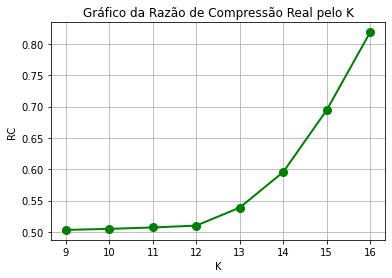

In [2]:
#GRÁFICOS COM RC REAIS#######################################

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

ax.plot(k, rc, 'go-', linewidth=2, markersize=8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set(xlabel='K', ylabel='RC', title='Gráfico da Razão de Compressão Real pelo K')
ax.grid()

# fig.savefig("test.png")
plt.show()

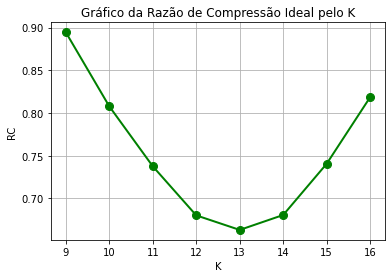

In [3]:
#GRÁFICOS COM RC IDEIAS#######################################

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

ax.plot(k, rcIdeal, 'go-', linewidth=2, markersize=8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set(xlabel='K', ylabel='RC', title='Gráfico da Razão de Compressão Ideal pelo K')
ax.grid()

# fig.savefig("test.png")
plt.show()

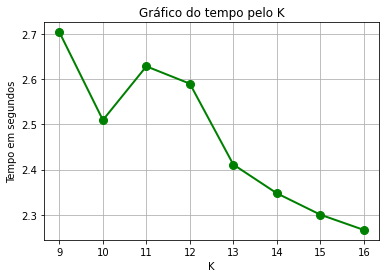

In [4]:
fig, bx = plt.subplots()

bx.plot(k, tempo, 'go-', linewidth=2, markersize=8)
bx.xaxis.set_major_locator(ticker.MultipleLocator(1))
bx.set(xlabel='K', ylabel='Tempo em segundos', title='Gráfico do tempo pelo K')
bx.grid()

plt.show()


In [5]:
import time
from tqdm import tqdm
import struct

for K in range(9,17):
    mensagem2 = open("intermediarios\intermediarioK" + str(K) + ".txt", "rb").read()
    #print(mensagem)
    mensagemInt = []
    for i in range(0,len(mensagem2),2):
        #print(str(mensagem[i]),str(mensagem[i+1]))
        #print(chr(mensagem[i]),chr(mensagem[i+1]))
        arr = bytearray([mensagem2[i],mensagem2[i+1]])
        #print(struct.unpack('H', arr))
        #if len(struct.unpack('H', arr)) > 1:
        #    print('letra: ',chr(struct.unpack('H', arr)[0]), ' e ', chr(struct.unpack('H', arr)[1]))
        #else:
        #    print('letra: ',chr(struct.unpack('H', arr)[0]))
        #print(struct.unpack('B', i.to_bytes(1,'big')))
        mensagemInt.append(struct.unpack('H', arr)[0])
    
    dicionario = {}

    for i in range(2**8):
        dicionario[i] = chr(i)  #string

    newKey = 256

    start = time.time()
    descomprimida = ''
    for i in tqdm(mensagemInt):
        #print('decodificando:', i, ' -> ', chr(i))
        if len(dicionario) <= 2**K:
            if newKey > 256:   #atualizar elemento anterior do dicionario
                dicionario[newKey-1] += dicionario[i][0]
        #print(dicionario[i])
        #print()
        descomprimida += dicionario[i]
        dicionario[newKey] = dicionario[i]  #criar elemento atual do dicionario
        newKey += 1

    #print(descomprimida.encode('ISO-8859-1'))
    end = time.time()

    outFile = open("saidas\saidaK" + str(K) + ".mp4" , "wb")
    for i in descomprimida:
        outFile.write(struct.pack('B', ord(i)))

    print('K = %d' %K)
    print('tamanho: %d -> %d' %(len(mensagemInt),len(descomprimida)))

    tempo.append(end-start)
    print('tempo %f segundos\n' % (end-start))

    outFile.close()

100%|█████████████████████████████████████████████████████████████████████████| 2097699/2097699 [00:02<00:00, 1010385.72it/s]


K = 9
tamanho: 2097699 -> 2111047
tempo 2.077103 segundos



100%|██████████████████████████████████████████████████████████████████████████| 2090702/2090702 [00:02<00:00, 992321.15it/s]


K = 10
tamanho: 2090702 -> 2111047
tempo 2.108844 segundos



100%|██████████████████████████████████████████████████████████████████████████| 2081530/2081530 [00:02<00:00, 979893.58it/s]


K = 11
tamanho: 2081530 -> 2111047
tempo 2.126207 segundos



100%|█████████████████████████████████████████████████████████████████████████| 2069378/2069378 [00:02<00:00, 1003674.15it/s]


K = 12
tamanho: 2069378 -> 2111047
tempo 2.063736 segundos



100%|██████████████████████████████████████████████████████████████████████████| 1959288/1959288 [00:02<00:00, 966783.76it/s]


K = 13
tamanho: 1959288 -> 2111047
tempo 2.027599 segundos



100%|██████████████████████████████████████████████████████████████████████████| 1772621/1772621 [00:01<00:00, 952048.50it/s]


K = 14
tamanho: 1772621 -> 2111047
tempo 1.863897 segundos



100%|██████████████████████████████████████████████████████████████████████████| 1520385/1520385 [00:01<00:00, 882970.13it/s]


K = 15
tamanho: 1520385 -> 2111047
tempo 1.723887 segundos



100%|██████████████████████████████████████████████████████████████████████████| 1289578/1289578 [00:01<00:00, 815711.80it/s]


K = 16
tamanho: 1289578 -> 2111047
tempo 1.582890 segundos



In [6]:
import filecmp

for i in tqdm(range(len(mensagem))):
    if(mensagem[i] != descomprimida[i]):
        string = mensagem[i-1] + mensagem[i] + mensagem[i+1]
        string2 = descomprimida[i-1] + mensagem[i] + mensagem[i+1]
        print(string, " ", string2)

100%|█████████████████████████████████████████████████████████████████████████| 2111047/2111047 [00:00<00:00, 2889460.40it/s]


In [7]:
filecmp.cmp('Disco Rígido Funcionando aberto.mp4', "saidas\saidaK16.mp4")

True